In [1]:
#K-Nearest Neighbors (KNN) Algorithm


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Import the iris dataset as provided by the sklearn Python module
from sklearn.datasets import load_iris
iris = load_iris()

type(iris)

# Converting sklearn data into Pandas dataframe
# target variables imply
# 0.0 - Setosa
# 1.0 - Versicolor
# 2.0 - Virginica
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


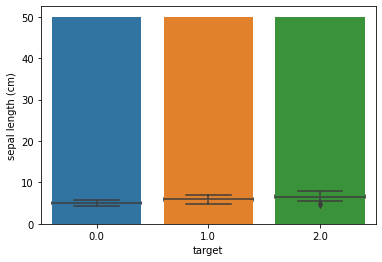

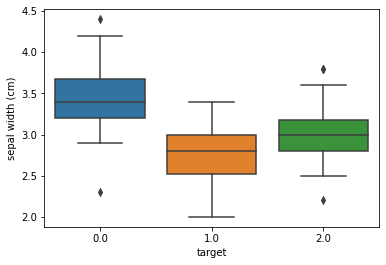

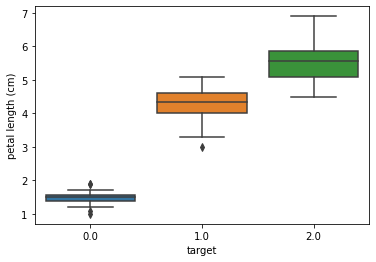

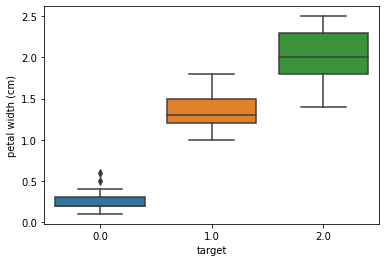

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

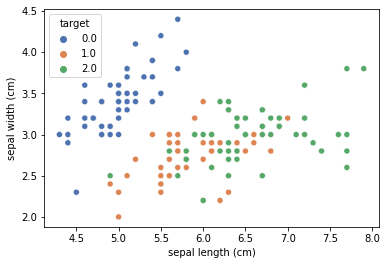

In [2]:
"""## Checking for outliers and imbalanced data"""

# data is perfectly balanced
sns.countplot(x='target', data=iris)

# not much of outliers to br handled
for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
  sns.boxplot(x='target', y=feature, data=iris)
  plt.show()

"""## Plotting a 2-D graph"""

sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='target', palette="deep")


In [3]:
"""## Separating features and target"""

# X variable contains flower features
# Y variable contains target values
X = iris.drop(['target'], axis=1)
y = iris['target']



In [4]:
"""## Split the dataset into train and test sets"""

# 60% of the data will be randomly selected at training data
# remaining 40% as testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)



In [5]:
# checking accuracy score for k-value rangin from 1 to 41
k_range = list(range(1,41))
scores = []


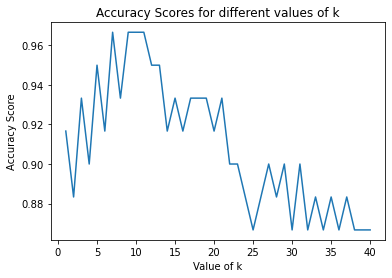

In [6]:
# model fitting and calculating accuracy score
# for each k-value in the range 1-41
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

# 60% of the data will be randomly selected at training data
# remaining 40% as testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


0.9166666666666666


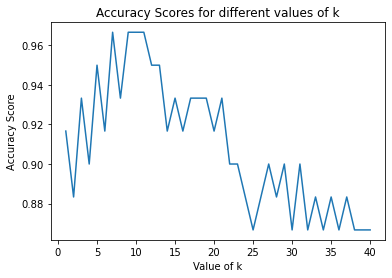

In [7]:

"""## Initial model"""

# Initial model with nearest neighbor as 1(k-value)
# further, k will be replaced with optimal value
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

"""## Finding the right k-value"""

# checking accuracy score for k-value rangin from 1 to 41
k_range = list(range(1,41))
scores = []

# model fitting and calculating accuracy score
# for each k-value in the range 1-41
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()



In [8]:
"""## Accuracy for optimal k-value"""

# 11 is the optimal k-value for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

"""## Predicting class of new data"""

knn = KNeighborsClassifier(n_neighbors=11)

# fitting the entire data without splitting
# into train and test
knn.fit(iris.drop(['target'], axis=1), iris['target'])

# new data to be classified
X_new = np.array([[2, 1.9, 5, 0.1]])
prediction = knn.predict(X_new)
print(prediction)

if prediction[0] == 0.0:
  print('Setosa')
elif prediction[0] == 1.0:
  print('Versicolor')
else:
  print('Virginica')

0.9666666666666667
[1.]
Versicolor


In [9]:
# When I increased the k = 40, I noticed the accuracy is decreasing, 11 is the optimal k-value for this dataset. So, I can get the better result with lower value of K in this dataset. The results are based on different k values, and therefore depend on how high or low the k value is.

# I came of X_new = np.array([[2, 1.9, 5, 0.1]]), the prediction is Versicolor